<a href="https://colab.research.google.com/github/Mayakshanesht/Machine_learning_practice/blob/main/BatteryParameterPrediction_Regression_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_excel("/content/drive/My Drive/Regression_model/BatteryData.xlsx")

In [5]:
df.describe()

,Temperature,SOC,OCV,R0,R1,C1,R2,C2,R3,C3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,1.009000,0.500000,3.756742,0.055437,0.015138,171.119241,0.017567,14560.450072,0.065350,1.736002e+04
std,15.622923,0.288993,0.219887,0.024434,0.014090,152.659658,0.022163,73045.669293,0.023366,1.224128e+05
min,-20.000000,0.000000,3.219450,0.020284,0.001363,16.967231,0.001000,51.149931,0.001000,1.098943e+02
25%,-10.000000,0.250000,3.578285,0.036006,0.005295,74.650717,0.003739,598.941940,0.047464,6.808246e+03
50%,0.000000,0.500000,3.729223,0.050058,0.011667,107.304688,0.006205,2473.845619,0.066892,1.055613e+04
75%,10.000000,0.750000,3.930534,0.069220,0.020614,223.285604,0.021465,5903.365113,0.085125,1.745157e+04
max,25.000000,1.000000,4.174735,0.100000,0.100000,1069.323193,0.100000,499999.999989,0.100000,5.000000e+06


In [138]:
features = df.iloc[:,[0,1]].values

In [139]:
Features=pd.DataFrame(features)
Features.describe()

,0,1
count,5000.000000,5000.000000
mean,1.009000,0.500000
std,15.622923,0.288993
min,-20.000000,0.000000
25%,-10.000000,0.250000
50%,0.000000,0.500000
75%,10.000000,0.750000
max,25.000000,1.000000


In [321]:
#for OCV to C3
labels1 = df.iloc[:,[5]].values

In [322]:
# Approach 1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                labels1,
                                                test_size = 0.2,
                                                random_state = 1) 

In [323]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
#model.score(X_train,y_train)
model.score(X_test,y_test)

0.388528496675803

In [325]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [153]:
#model = RandomForestRegressor()
#model.fit(X_train,y_train)

# Get the mean absolute error on the validation data
#predicted_prices = model.predict(val_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [155]:
#model = XGBRegressor()
#model.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
#XGBpredictions = XGBModel.predict(val_X)X_

[14:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [313]:
prediction=model.predict(np.array([[float(-20),float(0)]]))
print(prediction[0])
df.head()

[16592.92932499]


,Temperature,SOC,OCV,R0,R1,C1,R2,C2,R3,C3
0,-20,0.000000,3.413677,0.099886,0.042825,30.355114,0.069265,106.386938,0.068595,109.894277
1,-20,0.001001,3.413677,0.099965,0.082599,73.205494,0.090646,294.673397,0.090442,299.644217
2,-20,0.002002,3.425065,0.100000,0.084219,73.708938,0.072803,305.837475,0.100000,2116.239024
3,-20,0.003003,3.445310,0.100000,0.056166,41.277335,0.024454,179.245795,0.100000,5198.101657
4,-20,0.004004,3.451138,0.100000,0.048189,32.008914,0.011852,143.866834,0.100000,6007.259928


In [25]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model1.save('saved_model/model1.h5') 

In [272]:
# Approach 2 using DNN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Flatten, Dense, Dropout, LSTM

In [326]:
#Create our FC layer as per our spec
#Flatten
input= Input(shape=(2,))

#we should add few more layers
#FC layer
finalLayer1=tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu')
finalLayer2=tf.keras.layers.Dropout(0.4)
finalLayer3=tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu')
finalLayer4=tf.keras.layers.Dropout(0.3)
finalLayer5=tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu')
finalLayer6=tf.keras.layers.Dropout(0.4)
finalLayer7=tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu')
finalLayer8=tf.keras.layers.Dropout(0.3)
finalLayer9=tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu')
finalLayer10=tf.keras.layers.Dropout(0.3)
finalLayer11 = tf.keras.layers.Dense(1,kernel_initializer='normal',activation='linear')

In [327]:
model1=Sequential([input,finalLayer1,finalLayer2,finalLayer3,finalLayer4,finalLayer5,finalLayer6,finalLayer7,finalLayer8,finalLayer9,finalLayer10,finalLayer11])
model1.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 128)               384       
_________________________________________________________________
dropout_104 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_105 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_106 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 256)             

In [328]:
model1.compile(optimizer='adam',
            
              loss='mae',
              metrics=['accuracy'])

In [329]:
history = model1.fit(X_train,y_train, epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
125/125 [==============================] - 2s 9ms/step - loss: 120.0823 - accuracy: 0.0000e+00 - val_loss: 71.3424 - val_accuracy: 0.0000e+00
Epoch 2/500
125/125 [==============================] - 1s 5ms/step - loss: 71.8132 - accuracy: 0.0000e+00 - val_loss: 64.4788 - val_accuracy: 0.0000e+00
Epoch 3/500
125/125 [==============================] - 1s 5ms/step - loss: 69.0779 - accuracy: 0.0000e+00 - val_loss: 64.4010 - val_accuracy: 0.0000e+00
Epoch 4/500
125/125 [==============================] - 1s 5ms/step - loss: 71.3997 - accuracy: 0.0000e+00 - val_loss: 64.4548 - val_accuracy: 0.0000e+00
Epoch 5/500
125/125 [==============================] - 1s 5ms/step - loss: 70.0310 - accuracy: 0.0000e+00 - val_loss: 63.8345 - val_accuracy: 0.0000e+00
Epoch 6/500
125/125 [==============================] - 1s 5ms/step - loss: 70.0072 - accuracy: 0.0000e+00 - val_loss: 68.5212 - val_accuracy: 0.0000e+00
Epoch 7/500
125/125 [==============================] - 1s 5ms/step - loss: 71.394

In [334]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model_new
model1.save('saved_model_new/model4.h5') 

In [332]:
prediction=model1.predict(np.array([[float(25),float(1)]]))
print(prediction[0])
df.tail()

[213.41393]


,Temperature,SOC,OCV,R0,R1,C1,R2,C2,R3,C3
4995,25,0.995996,4.166903,0.024393,0.013199,76.552824,0.004731,11290.017291,0.029988,18637.094756
4996,25,0.996997,4.168861,0.024596,0.013435,77.253216,0.006602,11539.577928,0.047491,20344.424342
4997,25,0.997998,4.170819,0.024799,0.013671,77.953608,0.008473,11789.138565,0.064994,22051.753929
4998,25,0.998999,4.172777,0.025003,0.013907,78.653999,0.010344,12038.699201,0.082497,23759.083515
4999,25,1.000000,4.174735,0.025206,0.014143,79.354391,0.012215,12288.259838,0.100000,25466.413102


In [333]:
prediction=model1.predict(features)
print(prediction[0])
df.head()

[32.38545]


,Temperature,SOC,OCV,R0,R1,C1,R2,C2,R3,C3
0,-20,0.000000,3.413677,0.099886,0.042825,30.355114,0.069265,106.386938,0.068595,109.894277
1,-20,0.001001,3.413677,0.099965,0.082599,73.205494,0.090646,294.673397,0.090442,299.644217
2,-20,0.002002,3.425065,0.100000,0.084219,73.708938,0.072803,305.837475,0.100000,2116.239024
3,-20,0.003003,3.445310,0.100000,0.056166,41.277335,0.024454,179.245795,0.100000,5198.101657
4,-20,0.004004,3.451138,0.100000,0.048189,32.008914,0.011852,143.866834,0.100000,6007.259928


In [362]:
model = keras.models.load_model("saved_model_new/model8.h5")

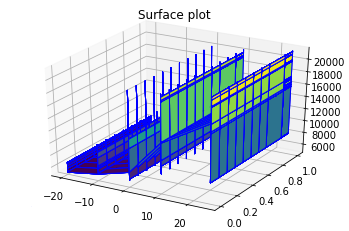

In [373]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = df.iloc[:,[0]].values
y= df.iloc[:,[1]].values.T
z=model.predict(features)
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis',edgecolor='blue')
ax.set_title('Surface plot')
plt.show()